In [ ]:
from scipy.io import loadmat
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as scs
import re
from numpy import genfromtxt

%matplotlib inline
plt.style.use('ggplot')
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
plt.rcParams["figure.figsize"] = (12,12)
pd.options.display.max_columns = None
pd.options.display.precision = 4

#An EEG processing library: https://github.com/pbashivan/EEGLearn
from eeg_learn_functions import *

In [ ]:
annots_data = loadmat('/content/drive/MyDrive/UMBC/RA/EEG Data/Data.mat')
annots_10sub = loadmat('/content/drive/MyDrive/UMBC/RA/EEG Data/10 Subjects/Data_10.mat')

### Data 1

In [ ]:
annots_data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'flatdat', 'graspdat'])

In [ ]:
annots_10sub.keys()

dict_keys(['__header__', '__version__', '__globals__', 'Fs', 'flat', 'grasp', 'hold'])

In [ ]:
type(annots_data['flatdat'])

numpy.ndarray

In [ ]:
type(annots_data['graspdat'])

numpy.ndarray

In [ ]:
print(annots_data['flatdat'].shape)

(512, 32, 30)


In [ ]:
print(annots_data['graspdat'].shape)

(512, 32, 30)


In [ ]:
[item.flat[0] for item in annots_data['flatdat'][0][0]]

[-27.209074020385742,
 -303.2654113769531,
 88.96969604492188,
 -8.812792778015137,
 27.80845832824707,
 -132.99310302734375,
 -2.8890531063079834,
 -114.99702453613281,
 -37.024234771728516,
 -177.01446533203125,
 10.235952377319336,
 -28.03677749633789,
 131.7841033935547,
 -126.73470306396484,
 197.68389892578125,
 -179.58291625976562,
 -117.27093505859375,
 -94.05742645263672,
 -175.81253051757812,
 -76.62857818603516,
 -53.59996032714844,
 15.061704635620117,
 -132.95504760742188,
 -97.57225036621094,
 -116.51411437988281,
 -75.78215026855469,
 -169.4119873046875,
 118.26604461669922,
 48.168312072753906,
 154.1232147216797]

In [ ]:
data = [[row.flat[0] for row in line] for line in annots]

NameError: ignored

### Data 2

In [ ]:
annots_10sub.keys()

dict_keys(['__header__', '__version__', '__globals__', 'Fs', 'flat', 'grasp', 'hold'])

In [ ]:
[item.flat[0] for item in annots_10sub['Fs'][0]]

[256]

In [ ]:
[item.flat[0] for item in annots_10sub['flat'][0][0]]

[56.29351289397565,
 111.06199067238535,
 52.502728572541024,
 -47.969140466372565,
 22.274986379221033,
 42.093896207313065,
 77.92979389066966,
 -110.17800659590708,
 78.37211420235907,
 -5.2062728680175185,
 4.200457722829748,
 110.70673528544575,
 252.44095810410684,
 39.76875351217439,
 -715.8351640464291,
 -18.745854521469838,
 176.92054552523535,
 -1.1283749525661917,
 -47.68308893111607,
 17.651599232422292,
 85.39680284282696,
 -30.18696292114358,
 -14.808743146457648,
 -13.799620147662385,
 82.8169284042918,
 -100.48732954288828,
 39.378997055821124,
 117.533666032978,
 -0.16208698455560988,
 2.629295834528887]

In [ ]:
[item.flat[0] for item in annots_10sub['grasp'][0][0]]

[-12.782626385240976,
 -9.335156660536773,
 -50.068142553894056,
 -50.44155095983749,
 -10.558281062521226,
 100.59760810524527,
 -74.37921249946493,
 -34.40870643589966,
 158.71125385064917,
 7.624395043249023,
 64.07538604037182,
 -16.530074599561427,
 -169.822515677548,
 -82.00257180383525,
 562.4929278544372,
 75.08009355696635,
 -196.558572785414,
 1071.5682045876742,
 -69.35185037777315,
 -89.24920498235281,
 -27.24342891232489,
 248.6802579395323,
 -206.70306354801835,
 44.4077298315536,
 22.065813612792837,
 -48.791960080328074,
 14.597619388196957,
 -146.45894180788957,
 -41.59869841811569,
 -135.72025881914536]

In [ ]:
[item.flat[0] for item in annots_10sub['hold'][0][0]]

[-132.9345494613752,
 25.587030020472294,
 84.3225685599393,
 15.161026378288446,
 33.83782102009775,
 10.39726928325399,
 37.97545857861271,
 -180.5897438782872,
 8.855278224574894,
 120.1648201657321,
 -42.911791076689745,
 2.5869477867672015,
 45.15394499292588,
 120.16327405860348,
 34.46799800226502,
 -129.7159521868335,
 -37.60923121951941,
 1319.5704534423373,
 39.839637361042286,
 92.17899878936795,
 -55.12068247651249,
 -194.32379594058943,
 109.08550950931463,
 -96.69645516102032,
 -63.12249741736788,
 24.46243499029096,
 -19.280437170302474,
 -144.93044645957949,
 -85.96815823063173,
 8.268914009318902]

In [ ]:
flat_data = [[row.flat[0] for row in line] for line in annots_10sub['flat'][0]]
columns = ['el1', 'el2', 'el3', 'el4', 'el5', 'el6', 'el7', 'el8', 'el9', 'el10', 'el11', 'el12', 'el13', 'el14', 'el15', 'el16', 'el17', 'el18', 'el19', 'el20', 'el21', 'el22', 'el23', 'el24', 'el25', 'el26', 'el27', 'el28', 'el29', 'el30']
df_flat = pd.DataFrame(flat_data, columns=columns)
df_flat = df_flat.assign(position="flat")

In [ ]:
df_flat

,el1,el2,el3,el4,el5,el6,el7,el8,el9,el10,el11,el12,el13,el14,el15,el16,el17,el18,el19,el20,el21,el22,el23,el24,el25,el26,el27,el28,el29,el30,position
0,56.2935,111.0620,52.5027,-47.9691,22.2750,42.0939,77.9298,-110.1780,78.3721,-5.2063,4.2005,110.7067,252.4410,39.7688,-715.8352,-18.7459,176.9205,-1.1284,-47.6831,17.6516,85.3968,-30.1870,-14.8087,-13.7996,82.8169,-100.4873,39.3790,117.5337,-0.1621,2.6293,flat
1,60.9304,99.1176,59.6608,1.1485,-23.4613,55.3156,97.4400,-69.5112,74.0105,42.6643,12.3399,65.5307,208.1311,95.1199,-345.4647,-35.2287,80.2230,2347.2116,-10.5179,34.9151,18.8350,48.1308,-27.6966,32.3025,75.8969,-46.4786,29.7791,87.3594,-25.5991,19.4020,flat
2,587.2828,1047.1190,607.1468,99.0059,219.8099,329.3915,941.4106,-928.8656,683.0216,26.9301,83.3571,647.9770,2554.3373,927.8094,-2967.9261,-474.8861,801.4963,21472.5911,-204.0788,447.8487,224.3985,95.4665,-579.1635,411.7523,572.2884,-349.6975,292.5007,757.6677,-375.7114,177.8451,flat
3,585.0700,971.6755,539.5359,-84.9985,-22.3131,749.6154,1073.9161,-577.4041,880.9981,322.0131,200.3607,651.5612,1686.5726,764.7671,-1887.2436,216.4649,770.7537,12277.4308,37.7594,216.8841,-27.8751,-46.0988,-403.4173,14.9670,589.8548,-293.3973,593.9097,1089.3485,-381.0337,-192.6475,flat
4,614.0093,1011.1731,554.2970,-106.4795,-79.1076,796.7091,1029.2899,-582.8969,878.7751,224.4502,111.0761,703.8322,1738.8707,758.4221,-2129.4333,142.1964,778.9489,5534.9795,105.4360,157.1871,-82.9981,-24.4085,-425.0141,205.0752,703.6277,-481.8532,275.4960,1474.2875,-134.5401,29.2929,flat
5,658.0713,1055.3963,601.8042,165.2253,-80.5241,573.9326,1089.2189,-545.2038,609.0834,103.0734,159.9142,534.0039,2386.7102,912.9142,-2593.6109,-343.9493,840.6795,6373.2527,-131.0776,401.4957,151.7182,383.9579,-327.3794,405.2298,618.2053,-394.4506,244.3834,810.3300,-385.2203,243.4616,flat
6,731.9592,901.8101,703.4287,-33.9335,-101.7455,676.2711,1180.1446,-349.2814,604.0120,342.0330,122.2834,556.6544,2325.2185,772.2880,-1121.2471,-397.3831,393.2567,32919.1295,-247.8814,-123.6892,122.6332,142.2738,-528.0088,155.7073,486.5686,-47.8680,678.6963,1002.6375,-438.1957,826.4457,flat
7,854.5312,1057.5752,604.6004,-648.4061,-62.3701,455.6941,1150.4623,-352.9925,423.1697,779.0105,86.3268,421.9390,2984.5529,645.1073,-346.5550,-237.0830,635.0919,-501.7841,-47.8274,97.4759,97.5564,499.6012,-587.4836,-261.6989,-106.5750,85.5790,825.0918,965.2995,-343.4281,454.3347,flat
8,347.3768,1336.0004,46.5434,-1050.6895,-619.4560,1195.2994,773.1490,253.5581,217.5090,1236.6569,-2631.3776,634.4950,-501.2787,484.0624,-395.7406,-16.9930,746.8941,-1648.9673,28.1986,594.7904,211.7826,314.8015,-713.7724,-587.9517,247.1202,382.5589,752.7604,1001.9801,-772.3817,779.4677,flat
9,556.0085,943.7958,496.2951,0.1844,-27.3149,762.6416,1017.7553,-601.4586,802.8865,188.1983,201.0125,715.7909,1710.1733,771.1011,-2030.1657,166.0850,783.3005,-1054.8080,52.7792,161.1408,-87.4444,-96.5354,-307.0651,151.4328,709.0856,-298.2653,637.7778,1052.0638,-373.9765,-145.2696,flat


In [ ]:
df_flat.shape

(32, 31)

In [ ]:
grasp_data = [[row.flat[0] for row in line] for line in annots_10sub['grasp'][0]]
columns = ['el1', 'el2', 'el3', 'el4', 'el5', 'el6', 'el7', 'el8', 'el9', 'el10', 'el11', 'el12', 'el13', 'el14', 'el15', 'el16', 'el17', 'el18', 'el19', 'el20', 'el21', 'el22', 'el23', 'el24', 'el25', 'el26', 'el27', 'el28', 'el29', 'el30']
df_grasp = pd.DataFrame(grasp_data, columns=columns)

In [ ]:
df_grasp

,el1,el2,el3,el4,el5,el6,el7,el8,el9,el10,el11,el12,el13,el14,el15,el16,el17,el18,el19,el20,el21,el22,el23,el24,el25,el26,el27,el28,el29,el30
0,-12.7826,-9.3352,-50.0681,-50.4416,-10.5583,100.5976,-74.3792,-34.4087,158.7113,7.6244,64.0754,-16.5301,-169.8225,-82.0026,562.4929,75.0801,-196.5586,1071.5682,-69.3519,-89.2492,-27.2434,248.6803,-206.7031,44.4077,22.0658,-48.7920,14.5976,-146.4589,-41.5987,-135.7203
1,-35.0431,-1.1723,-27.1358,-43.4453,-37.8408,73.8785,-8.3134,1.2772,121.6280,-1.4607,46.3363,-0.9083,-131.6059,13.7887,196.7406,46.5536,-73.4365,-6873.2857,-17.5170,-92.4381,-12.1276,187.8911,-38.8266,68.9948,74.2075,15.8948,6.9634,-47.0460,0.7391,-19.3544
2,-506.7497,-58.0845,-360.4631,-658.1228,-229.9462,872.0838,-417.2051,-178.3044,1397.4262,108.9636,542.3852,58.1652,-1216.4462,221.5316,2033.8482,472.4623,-785.2978,-59662.6559,-170.3894,-846.7375,-92.2704,2233.2649,-495.2734,742.8123,695.6391,295.1501,40.0531,-426.1346,68.6267,-309.1201
3,-213.2838,-55.3272,-341.7912,-429.9606,-325.1139,639.7138,46.0229,43.1180,1063.9445,132.4612,476.3375,-211.9346,-826.1914,119.8025,689.9378,615.1314,-631.6097,-36632.7488,-96.8396,-907.0302,-195.3432,1772.0922,234.0868,380.0794,777.8698,220.8231,232.5667,-496.6837,311.2395,340.4688
4,-218.8492,46.5487,-271.9483,-468.4877,-333.7540,667.0398,9.8729,96.6885,1158.7298,141.3490,497.1572,-208.6678,-1051.3688,115.6968,790.1513,616.3022,-666.4164,-13259.1574,39.8472,-815.7791,-176.9732,1845.5413,-78.2908,368.8027,997.1987,456.8405,310.5147,-669.3149,49.8305,-49.2987
5,-462.0900,107.6370,-144.3678,-511.6352,-309.8513,904.2570,-96.6879,-59.7860,1265.2584,120.2886,474.4674,36.1442,-1168.2278,143.0732,1391.9044,486.8399,-632.5614,-19372.5489,-47.4297,-782.3315,-212.9109,1939.2197,-529.0014,730.6777,820.1662,275.0452,201.1380,-471.9287,99.8916,-377.5778
6,-278.7098,-3.3254,-117.9110,-438.8758,-414.7467,839.5066,-56.7725,126.4909,1032.3403,128.3181,341.8526,-42.5188,-1091.0885,392.7746,-30.3138,485.3294,-102.2468,-102064.5426,36.0116,-260.8128,-61.2167,1048.1578,205.9289,644.8623,1048.8299,200.8683,503.1494,-226.3581,41.7678,46.2897
7,-23.7625,291.5080,41.0611,-385.5922,-600.6976,1048.6366,-32.7662,168.6672,770.5520,123.3356,30.8286,-321.6868,-1205.6353,630.8926,-733.4749,468.7673,368.7696,4517.6889,61.7724,-673.1145,295.1795,1444.9967,167.1961,924.4692,1066.3487,445.4110,423.7046,-526.7973,-561.9164,-274.4648
8,245.8992,98.8213,126.4095,-357.6227,-814.6098,743.7738,-287.4938,-175.2013,-48.9073,-51.2343,2790.4997,-1345.8591,-1381.1740,769.7970,-1175.4823,347.6179,229.8202,7711.8126,125.2808,-699.1940,215.2379,975.9969,573.3377,909.9938,963.4314,203.3733,247.2347,210.8929,-351.3091,-77.7912
9,-157.3168,-1.1158,-240.6294,-464.0544,-308.9248,655.0467,43.4034,88.0920,1223.5534,152.0126,526.6193,-249.9142,-913.9536,140.7594,881.2822,646.4845,-651.1102,2987.1429,-31.9066,-748.4504,-219.1844,1793.7427,196.8383,368.0643,760.5544,134.5514,329.1234,-557.0445,268.6002,266.5650


In [ ]:
hold_data = [[row.flat[0] for row in line] for line in annots_10sub['hold'][0]]
columns = ['el1', 'el2', 'el3', 'el4', 'el5', 'el6', 'el7', 'el8', 'el9', 'el10', 'el11', 'el12', 'el13', 'el14', 'el15', 'el16', 'el17', 'el18', 'el19', 'el20', 'el21', 'el22', 'el23', 'el24', 'el25', 'el26', 'el27', 'el28', 'el29', 'el30']
df_hold = pd.DataFrame(hold_data, columns=columns)

In [ ]:
df_hold

,el1,el2,el3,el4,el5,el6,el7,el8,el9,el10,el11,el12,el13,el14,el15,el16,el17,el18,el19,el20,el21,el22,el23,el24,el25,el26,el27,el28,el29,el30
0,-132.9345,25.5870,84.3226,15.1610,33.8378,10.3973,37.9755,-180.5897,8.8553,120.1648,-42.9118,2.5869,45.1539,120.1633,34.4680,-129.7160,-37.6092,1.3196e+03,39.8396,92.1790,-55.1207,-194.3238,109.0855,-96.6965,-63.1225,24.4624,-19.2804,-144.9304,-85.9682,8.2689
1,-92.0580,8.5524,51.4733,-16.2696,45.3391,5.0250,-13.7419,-154.8869,-9.7419,50.8320,-77.8006,-13.5462,-60.3447,-47.1052,30.3685,-66.7941,-65.1178,-6.9868e+03,21.4188,50.2076,-28.3896,-221.9928,-57.3345,-148.9882,-19.8624,-19.2493,-61.3299,-115.6868,14.4480,-45.2940
2,-808.6534,178.7594,661.0780,-101.5754,255.0881,147.3280,58.7924,-1598.0521,-73.1660,530.5717,-648.5789,-189.4125,-738.2467,-292.3102,180.8454,-557.2295,-595.6501,-6.1115e+04,33.2649,347.5823,-103.5041,-2282.6573,-780.8167,-1761.5700,-334.9095,-261.7492,-699.1733,-1081.9591,120.1199,-396.3153
3,-907.5627,-36.8874,516.8135,-105.3109,213.7886,-26.8200,-183.1844,-1440.9530,29.8046,430.0920,-933.5275,-31.5749,-500.9403,-341.2844,140.9693,-945.8640,-643.6990,-3.3821e+04,228.3639,442.0190,-367.9189,-1896.1221,-47.4297,-1207.2796,-82.4384,-45.0513,-818.7810,-1458.2634,244.6982,-408.6934
4,-859.2966,-14.7549,504.9263,-13.8809,386.8541,-35.1985,-166.5850,-1457.4028,-27.5569,477.7602,-829.1904,-47.5919,-497.5404,-299.9296,170.3579,-1026.7107,-595.1012,-1.3010e+04,122.5523,462.6696,-281.9760,-2158.0727,-329.7283,-1533.8529,-535.9858,-207.9764,-994.1119,-1481.3232,79.9310,-428.7475
5,-871.4832,53.4557,411.7315,-271.4028,394.4392,27.1081,-162.0085,-1704.7469,-208.5520,552.7123,-702.1828,-164.7324,-733.9905,-503.7247,183.7773,-554.9513,-750.6827,-1.8414e+04,14.2993,356.2254,-148.2738,-2303.0055,-763.5181,-1709.3600,-321.4224,-295.5563,-791.5636,-1170.8741,82.8338,-470.4726
6,-804.9491,-59.0426,244.2378,-149.1304,321.3632,33.0929,-342.3420,-1575.3554,-102.7147,384.4072,-939.1195,-264.8398,-969.2149,-598.7065,22.7855,-586.4060,-828.6949,-1.0415e+05,170.5245,206.5181,-563.8366,-1885.2281,-1115.4354,-1964.3339,-681.4918,-215.2799,-1050.7920,-1374.7700,-2.8194,-867.2100
7,-1308.4540,-84.3003,-188.0481,-16.3964,528.7374,97.2453,-657.3471,-1463.6977,-529.6744,1.5353,-760.2751,-417.8922,-1546.7024,-738.4831,-349.0095,-567.0101,-1510.5970,4.2977e+03,-46.2265,189.5461,-342.4722,-1971.6154,-1500.0589,-2040.0582,133.3036,-657.7742,-1125.1194,-269.2480,551.6565,-616.4265
8,-912.8856,-164.3683,140.2103,373.8055,572.7752,-77.8847,-376.3783,-1717.6163,653.8951,18.6543,3670.8860,986.0129,128.7949,-374.0793,-246.1834,-747.4505,-1211.7251,8.7016e+03,-230.3441,63.7779,-537.0881,-1772.7726,-1139.1432,-2061.8384,-329.9745,-455.7285,-816.2160,-1322.4018,513.3214,-721.3017
9,-852.8461,24.5995,475.1140,-115.2406,323.4030,-59.5817,-137.8744,-1489.0833,7.4043,424.5801,-917.5311,0.4055,-520.8441,-369.3055,170.4735,-948.7513,-585.5962,5.8396e+03,166.6717,493.1386,-353.8742,-1900.4828,15.2669,-1159.0868,-146.6039,-78.2336,-818.6945,-1341.6856,275.1771,-479.2143


In [ ]:
fs_data = [[row.flat[0] for row in line] for line in annots_10sub['Fs']]
columns = ['FS']
df_fs = pd.DataFrame(fs_data, columns=columns)

In [ ]:
df_fs

,FS
0,256


## Initial EDA

Three DataFrames - df_flat, df_grasp, df_hold

### Flat Hand EDA

In [ ]:
df_flat.head()

,el1,el2,el3,el4,el5,el6,el7,el8,el9,el10,el11,el12,el13,el14,el15,el16,el17,el18,el19,el20,el21,el22,el23,el24,el25,el26,el27,el28,el29,el30,position
0,56.2935,111.0620,52.5027,-47.9691,22.2750,42.0939,77.9298,-110.1780,78.3721,-5.2063,4.2005,110.7067,252.4410,39.7688,-715.8352,-18.7459,176.9205,-1.1284,-47.6831,17.6516,85.3968,-30.1870,-14.8087,-13.7996,82.8169,-100.4873,39.3790,117.5337,-0.1621,2.6293,flat
1,60.9304,99.1176,59.6608,1.1485,-23.4613,55.3156,97.4400,-69.5112,74.0105,42.6643,12.3399,65.5307,208.1311,95.1199,-345.4647,-35.2287,80.2230,2347.2116,-10.5179,34.9151,18.8350,48.1308,-27.6966,32.3025,75.8969,-46.4786,29.7791,87.3594,-25.5991,19.4020,flat
2,587.2828,1047.1190,607.1468,99.0059,219.8099,329.3915,941.4106,-928.8656,683.0216,26.9301,83.3571,647.9770,2554.3373,927.8094,-2967.9261,-474.8861,801.4963,21472.5911,-204.0788,447.8487,224.3985,95.4665,-579.1635,411.7523,572.2884,-349.6975,292.5007,757.6677,-375.7114,177.8451,flat
3,585.0700,971.6755,539.5359,-84.9985,-22.3131,749.6154,1073.9161,-577.4041,880.9981,322.0131,200.3607,651.5612,1686.5726,764.7671,-1887.2436,216.4649,770.7537,12277.4308,37.7594,216.8841,-27.8751,-46.0988,-403.4173,14.9670,589.8548,-293.3973,593.9097,1089.3485,-381.0337,-192.6475,flat
4,614.0093,1011.1731,554.2970,-106.4795,-79.1076,796.7091,1029.2899,-582.8969,878.7751,224.4502,111.0761,703.8322,1738.8707,758.4221,-2129.4333,142.1964,778.9489,5534.9795,105.4360,157.1871,-82.9981,-24.4085,-425.0141,205.0752,703.6277,-481.8532,275.4960,1474.2875,-134.5401,29.2929,flat


In [ ]:
df_flat.describe()

,el1,el2,el3,el4,el5,el6,el7,el8,el9,el10,el11,el12,el13,el14,el15,el16,el17,el18,el19,el20,el21,el22,el23,el24,el25,el26,el27,el28,el29,el30
count,32.0000,32.0000,32.0000,32.0000,32.0000,32.0000,32.0000,32.0000,32.0000,32.0000,32.0000,32.0000,32.0000,32.0000,32.0000,32.0000,32.0000,32.0000,32.0000,32.0000,32.0000,32.0000,32.0000,32.0000,32.0000,32.0000,32.0000,32.0000,32.0000,32.0000
mean,1414.0838,609.1887,380.5162,-212.8797,351.9553,563.8964,1055.7757,-46.8806,1108.2030,223.6033,-505.3890,-465.1847,102.5242,467.0204,-3558.2385,2538.1510,1848.1787,26663.2789,-364.7242,2970.7459,2352.3039,668.1208,623.8618,-29.3677,388.1781,-497.4784,453.1435,646.7369,-188.8332,622.9993
std,4249.5157,2170.1849,1593.8550,532.9041,1840.3558,1684.2919,1055.1833,2164.8762,4024.5519,1315.7107,2717.8132,5157.8015,13309.3334,652.2488,6197.4193,13088.4260,7844.1076,113220.0850,1525.6813,13599.5980,11369.5707,2772.4916,5696.6929,597.9718,321.8170,1858.4504,895.9390,474.8610,522.8288,931.7717
min,-856.7267,-11096.9842,-8048.8219,-1963.1361,-1087.7365,-1580.0305,77.9298,-1073.3192,-114.1652,-2273.5334,-15142.4762,-28662.0165,-71843.7656,-1350.7440,-25170.3321,-864.2931,-1045.2933,-59926.7597,-8565.5803,-123.6892,-208.1657,-637.6984,-1374.0898,-2545.0840,-459.9709,-10530.7498,-510.1321,-81.4740,-880.8490,-1043.0214
25%,303.8128,878.6441,470.2486,-550.2319,-220.9471,-12.8875,901.1310,-578.7773,111.3271,-101.5879,-71.3199,242.2982,1280.8503,112.9194,-2628.5687,-468.4066,268.2844,-506.5086,-259.3931,210.3593,83.5277,-37.9317,-522.1577,-206.1644,221.9055,-360.8858,128.1546,225.6653,-378.5153,4.7302
50%,554.4670,999.0126,605.8736,-84.9261,-43.7463,229.2528,975.8154,-358.3111,401.7965,138.8521,80.9158,477.9715,1724.5220,411.2682,-1681.7191,-214.1269,623.5769,6052.6664,-61.5630,454.1830,218.0906,150.5536,-398.1869,-7.4070,465.1104,-140.9936,291.9444,581.3511,-323.2707,385.7590
75%,676.5433,1109.1463,869.3262,82.1076,88.5401,599.5172,1036.7106,-296.8836,686.4312,398.3143,175.8329,648.8731,2581.4395,777.0788,-490.0248,-3.2358,772.8025,21190.1717,37.7597,742.7475,488.0824,390.1807,-155.0240,242.8355,619.8328,24.9484,548.2047,1002.1444,-88.9864,919.9061
max,22905.5121,1989.4176,2232.9089,681.1423,7382.0637,8462.9116,6604.6808,11716.7799,23096.7218,5955.0205,250.9234,1480.4830,9888.4051,2876.8863,1707.7318,72614.5904,44777.5637,635858.9988,544.2810,77415.7238,64612.1531,15717.3738,31786.6578,1382.1350,887.8814,382.5589,5049.7794,1885.4709,2131.0235,3686.3873


In [ ]:
df_flat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 31 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   el1       32 non-null     float64
 1   el2       32 non-null     float64
 2   el3       32 non-null     float64
 3   el4       32 non-null     float64
 4   el5       32 non-null     float64
 5   el6       32 non-null     float64
 6   el7       32 non-null     float64
 7   el8       32 non-null     float64
 8   el9       32 non-null     float64
 9   el10      32 non-null     float64
 10  el11      32 non-null     float64
 11  el12      32 non-null     float64
 12  el13      32 non-null     float64
 13  el14      32 non-null     float64
 14  el15      32 non-null     float64
 15  el16      32 non-null     float64
 16  el17      32 non-null     float64
 17  el18      32 non-null     float64
 18  el19      32 non-null     float64
 19  el20      32 non-null     float64
 20  el21      32 non-null     float64


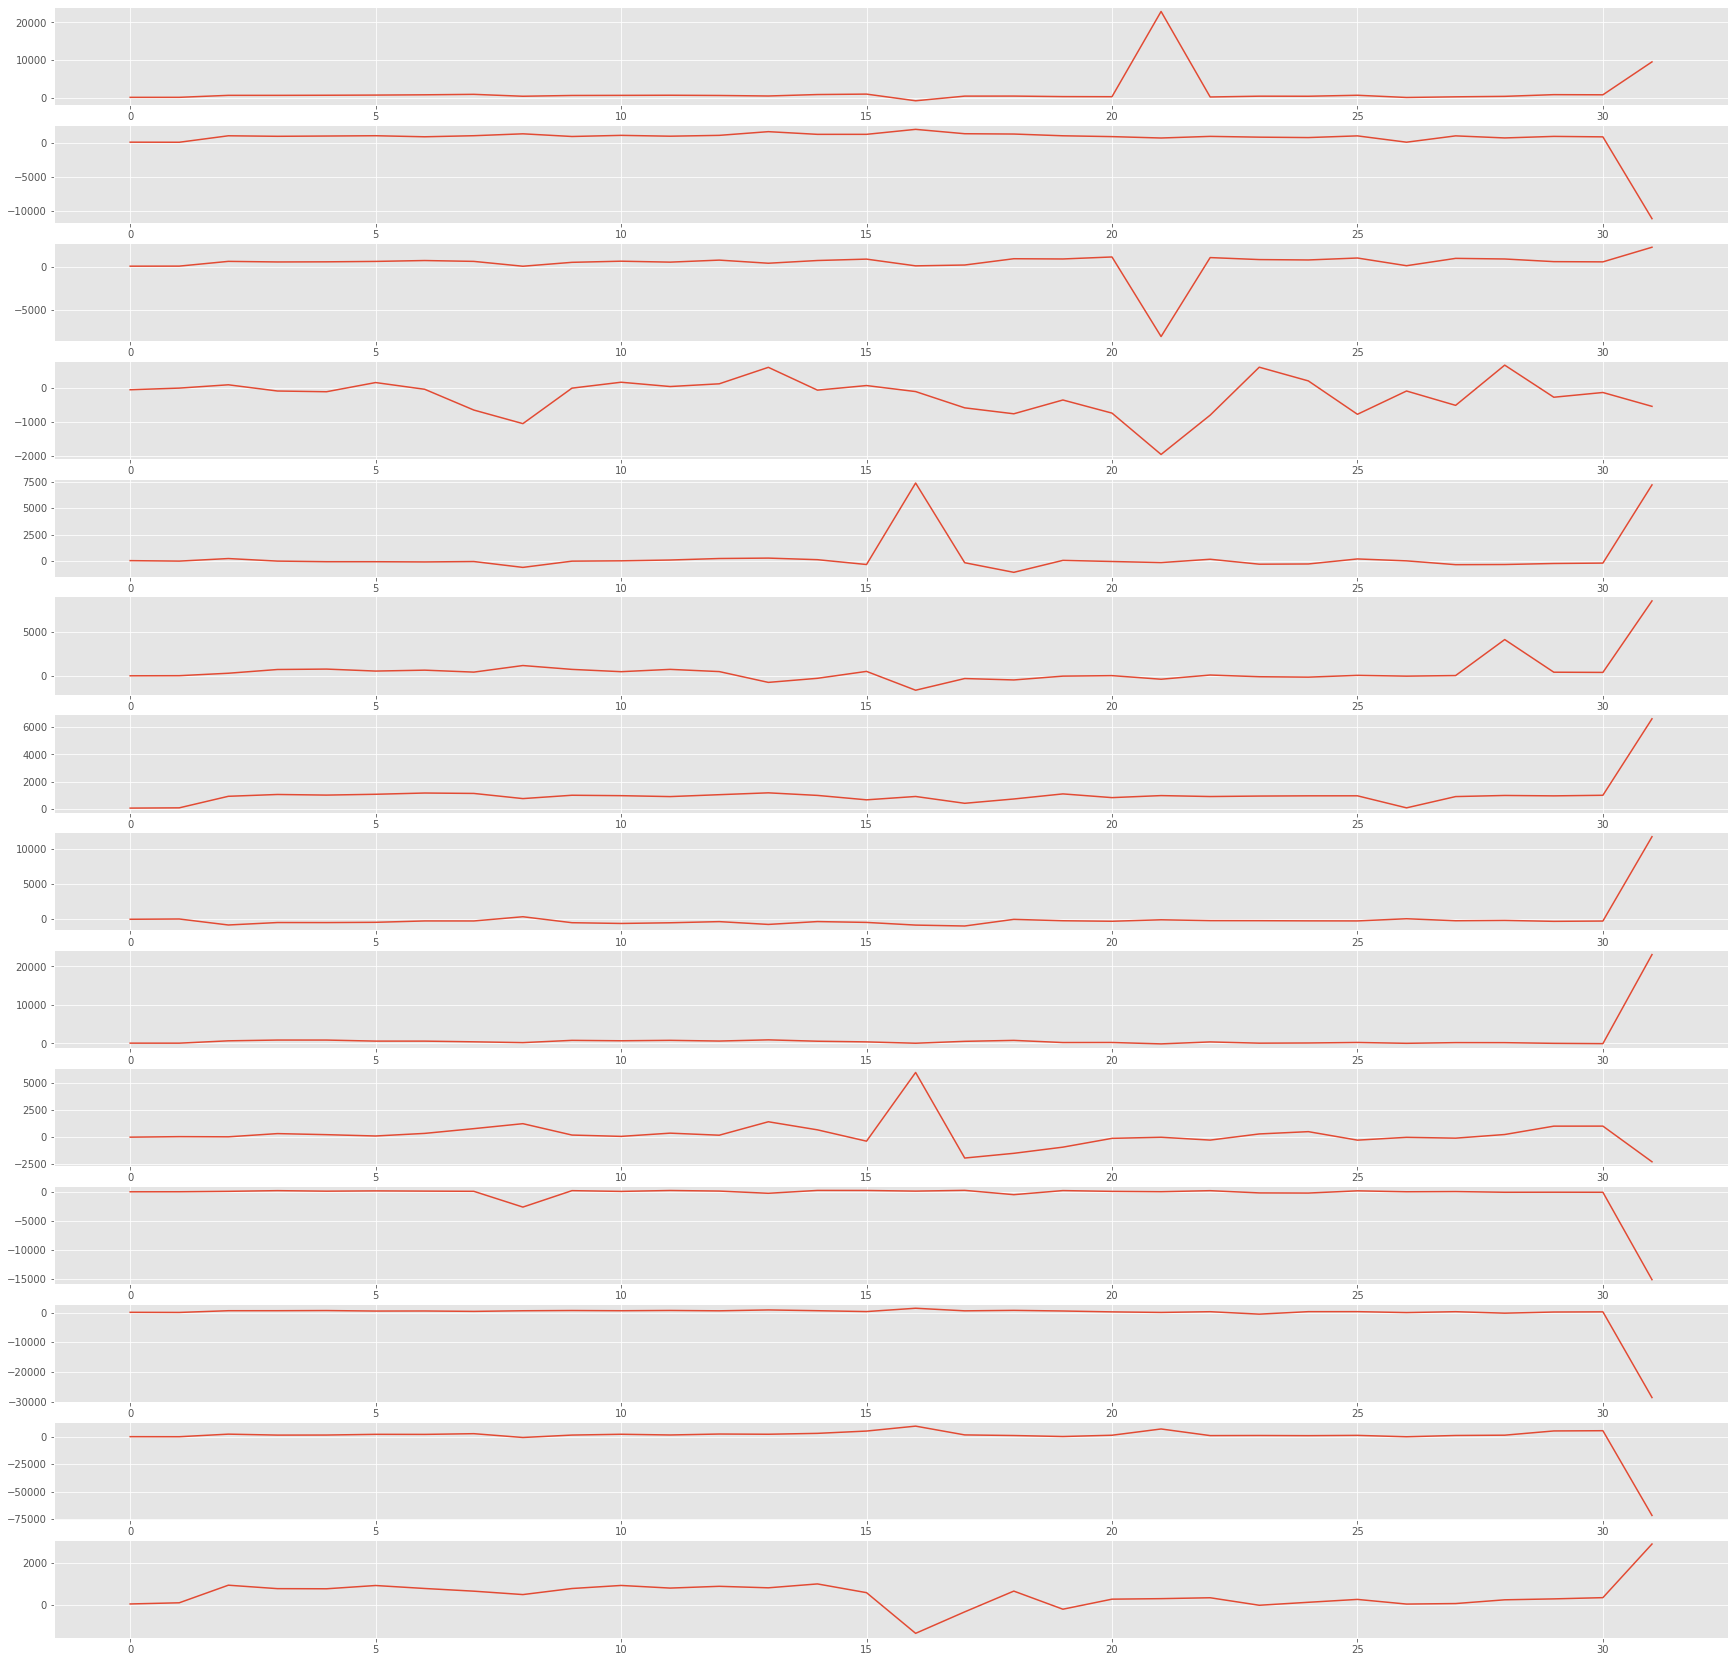

In [ ]:
fig, axs = plt.subplots(14, 1, figsize=(30,30))
for i, ax in enumerate(fig.axes):
    ax.plot(df_flat.iloc[:, i])
    #ax.set_xticks([])
    #ax.set_yticks([])
plt.show()

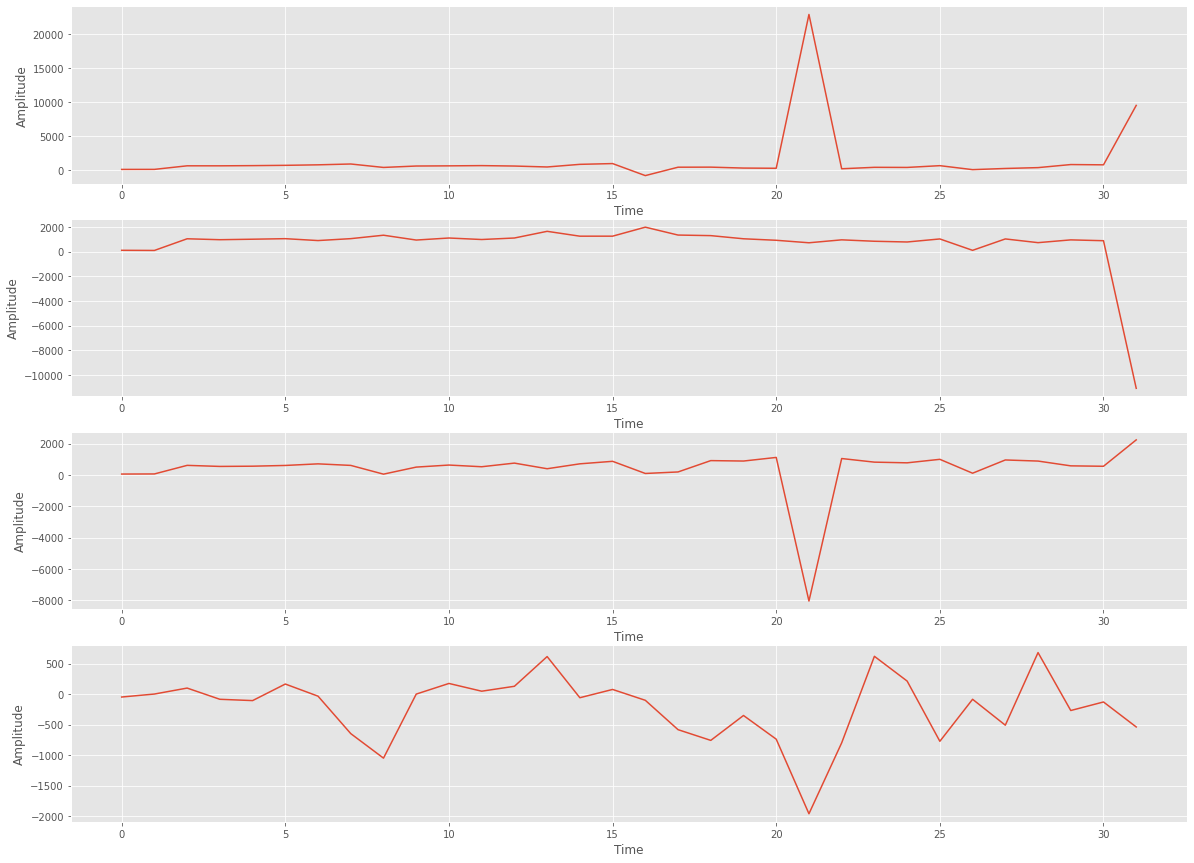

In [ ]:
fig, axs = plt.subplots(4, 1, figsize=(20,15))

for i, ax in enumerate(fig.axes):
    ax.plot(df_flat.iloc[:, i])
    ax.set_xlabel('Time')
    ax.set_ylabel('Amplitude')

#ax.set_xticks([])
#ax.set_yticks([])
plt.show()

In [ ]:
snippet = df_flat.iloc[:126, i]

(32,)


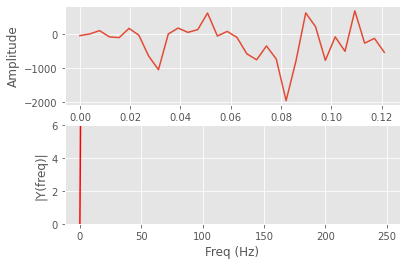

In [ ]:
def plot_fft(snippet):
    Fs = 256.0;  # sampling rate
    #Ts = len(snippet)/Fs/Fs; # sampling interval
    snippet_time = len(snippet)/Fs
    Ts = 1.0/Fs; # sampling interval
    t = np.arange(0,snippet_time,Ts) # time vector

    # ff = 5;   # frequency of the signal
    # y = np.sin(2*np.pi*ff*t)
    y = snippet
#     print('Ts: ',Ts)
#     print(t)
#     print(y.shape)
    n = len(y) # length of the signal
    k = np.arange(n)
    T = n/Fs
    frq = k/T # two sides frequency range
    # frq = frq[range(n/2)] # one side frequency range

    Y = np.fft.fft(y)/n # fft computing and normalization
    # Y = Y[range(n/2)]
    print(Y.shape)
    #Added in: (To remove bias.)
    Y[0] = 0

    fig, ax = plt.subplots(2, 1)
    ax[0].plot(t,y)
    ax[0].set_xlabel('Time')
    ax[0].set_ylabel('Amplitude')
    ax[1].set_ylim(0, 6)
    ax[1].plot(frq,abs(Y),'r') # plotting the spectrum
    ax[1].set_xlabel('Freq (Hz)')
    ax[1].set_ylabel('|Y(freq)|');

plot_fft(snippet)
#plot_url = plt.plot_mpl(fig, filename='mpl-basic-fft')

(32,)


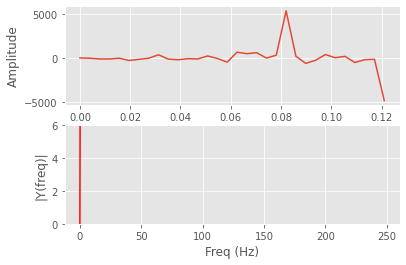

In [ ]:
snippet = df_hold.iloc[:, i]
plot_fft(snippet)

(32,)


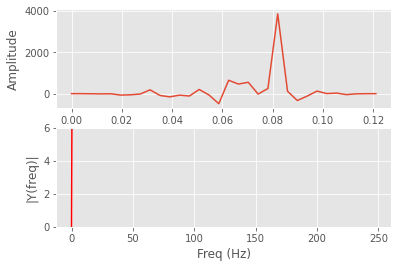

In [ ]:
#Subtracting the mean and applying a hanning window.
snippet = df_hold.iloc[:127, i]
snippet = snippet - np.mean(snippet)
np.hanning(len(snippet))
plot_fft(np.hanning(len(snippet))*snippet)

https://stackoverflow.com/questions/25735153/plotting-a-fast-fourier-transform-in-python
(Search for 'bin')|

(16,)


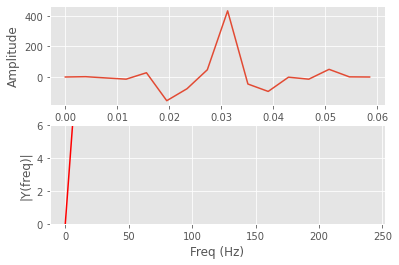

In [ ]:
#Subtracting the mean and applying a hanning window.
snippet = df_hold.iloc[0:16, i]
snippet = snippet - np.mean(snippet)
np.hanning(len(snippet))
plot_fft(np.hanning(len(snippet))*snippet)

In [ ]:
theta = (4,8)
alpha = (8,12)
beta = (12,40)

In [ ]:
def get_fft(snippet):
    Fs = 128.0;  # sampling rate
    #Ts = len(snippet)/Fs/Fs; # sampling interval
    snippet_time = len(snippet)/Fs
    Ts = 1.0/Fs; # sampling interval
    t = np.arange(0,snippet_time,Ts) # time vector

    # ff = 5;   # frequency of the signal
    # y = np.sin(2*np.pi*ff*t)
    y = snippet
#     print('Ts: ',Ts)
#     print(t)
#     print(y.shape)
    n = len(y) # length of the signal
    k = np.arange(n)
    T = n/Fs
    frq = k/T # two sides frequency range
    frq = frq[range(n/2)] # one side frequency range

    Y = np.fft.fft(y)/n # fft computing and normalization
    Y = Y[range(n/2)]
    #Added in: (To remove bias.)
    #Y[0] = 0
    return frq,abs(Y)
f,Y = get_fft(np.hanning(len(snippet))*snippet)

TypeError: ignored

NameError: ignored

### Grasp Hand EDA|

In [ ]:
df_grasp.head()

,el1,el2,el3,el4,el5,el6,el7,el8,el9,el10,el11,el12,el13,el14,el15,el16,el17,el18,el19,el20,el21,el22,el23,el24,el25,el26,el27,el28,el29,el30
0,-12.7826,-9.3352,-50.0681,-50.4416,-10.5583,100.5976,-74.3792,-34.4087,158.7113,7.6244,64.0754,-16.5301,-169.8225,-82.0026,562.4929,75.0801,-196.5586,1071.5682,-69.3519,-89.2492,-27.2434,248.6803,-206.7031,44.4077,22.0658,-48.7920,14.5976,-146.4589,-41.5987,-135.7203
1,-35.0431,-1.1723,-27.1358,-43.4453,-37.8408,73.8785,-8.3134,1.2772,121.6280,-1.4607,46.3363,-0.9083,-131.6059,13.7887,196.7406,46.5536,-73.4365,-6873.2857,-17.5170,-92.4381,-12.1276,187.8911,-38.8266,68.9948,74.2075,15.8948,6.9634,-47.0460,0.7391,-19.3544
2,-506.7497,-58.0845,-360.4631,-658.1228,-229.9462,872.0838,-417.2051,-178.3044,1397.4262,108.9636,542.3852,58.1652,-1216.4462,221.5316,2033.8482,472.4623,-785.2978,-59662.6559,-170.3894,-846.7375,-92.2704,2233.2649,-495.2734,742.8123,695.6391,295.1501,40.0531,-426.1346,68.6267,-309.1201
3,-213.2838,-55.3272,-341.7912,-429.9606,-325.1139,639.7138,46.0229,43.1180,1063.9445,132.4612,476.3375,-211.9346,-826.1914,119.8025,689.9378,615.1314,-631.6097,-36632.7488,-96.8396,-907.0302,-195.3432,1772.0922,234.0868,380.0794,777.8698,220.8231,232.5667,-496.6837,311.2395,340.4688
4,-218.8492,46.5487,-271.9483,-468.4877,-333.7540,667.0398,9.8729,96.6885,1158.7298,141.3490,497.1572,-208.6678,-1051.3688,115.6968,790.1513,616.3022,-666.4164,-13259.1574,39.8472,-815.7791,-176.9732,1845.5413,-78.2908,368.8027,997.1987,456.8405,310.5147,-669.3149,49.8305,-49.2987


In [ ]:
df_grasp.describe()

,el1,el2,el3,el4,el5,el6,el7,el8,el9,el10,el11,el12,el13,el14,el15,el16,el17,el18,el19,el20,el21,el22,el23,el24,el25,el26,el27,el28,el29,el30
count,32.0000,32.0000,32.0000,32.0000,32.0000,32.0000,32.0000,32.0000,32.0000,32.0000,32.0000,32.0000,32.0000,32.0000,32.0000,32.0000,32.0000,32.0000,32.0000,32.0000,32.0000,32.0000,32.0000,32.0000,32.0000,32.0000,32.0000,32.0000,32.0000,32.0000
mean,-377.1245,-231.3276,-701.4878,-667.7780,-204.1183,704.3460,-1140.1576,-65.6220,1542.5967,-131.2589,1289.9818,241.1557,-525.6289,2572.8540,95.9367,378.3262,214.8992,-34736.2097,-492.1230,-1442.7109,-295.1600,532.1214,231.2421,613.4064,669.6932,-78.8556,-93.0814,-125.4900,54.4502,-171.4218
std,482.5429,1514.2945,1915.2125,537.8223,659.9037,741.1320,5390.1424,718.4170,2181.7858,789.7231,5173.1422,2468.1424,3126.6325,12509.8425,7462.4906,6738.2076,2682.0282,105340.5535,3137.8564,4897.4957,2790.8693,4486.2181,3219.4335,543.4339,385.3710,1220.8969,458.8013,335.4236,263.2394,791.5948
min,-2051.2168,-8416.0956,-10965.9062,-2899.9271,-3021.5724,-2190.0089,-30573.8300,-2503.3929,-48.9073,-3343.4220,-394.3623,-1345.8591,-4532.0604,-1094.3714,-37283.1794,-25693.3915,-2050.5114,-483132.7127,-17641.8563,-28235.9933,-15508.5077,-23855.8232,-1812.9480,-1275.0973,-417.4326,-6395.6497,-1155.8093,-669.3149,-561.9164,-1484.1193
25%,-369.7904,-71.7474,-558.5985,-726.7619,-352.7658,664.0415,-263.9884,-136.3835,940.5577,-8.7028,27.6540,-331.1505,-1264.2177,131.8643,-534.3856,65.8337,-575.4332,-62427.5126,-36.1704,-812.0881,-76.1077,1005.4210,-498.9578,377.2602,572.2953,-20.6772,-286.4553,-401.1514,-74.0907,-478.3061
50%,-224.8794,-1.1441,-283.3413,-560.5117,-246.2745,892.2664,-58.3173,-20.4499,1239.1858,62.8971,351.8555,-125.5933,-933.0543,397.2696,551.9399,393.0712,-115.5205,-18634.1844,37.9294,-666.0815,162.6945,1275.0564,-321.3212,722.4253,751.0155,204.0726,27.3254,-128.6969,44.5418,-292.3812
75%,-148.7164,136.1528,-117.5784,-436.6470,136.1601,1049.5284,44.0583,104.1391,1429.1939,152.0702,526.7386,19.6821,-285.5830,630.4214,1101.9057,586.6535,-22.1752,2828.7808,203.7018,-376.2316,447.3320,1777.5048,81.8540,915.7826,895.6823,288.4089,231.4064,133.5187,253.6603,-41.8127
max,245.8992,481.4565,126.4095,-43.4453,1057.0016,1562.1483,238.0374,2521.1247,12931.4207,505.9397,29459.6480,13654.1874,15828.8431,71088.0102,12061.5584,27310.9338,14652.6746,178470.0373,463.2299,-64.4583,728.8981,2233.2649,17626.9443,1553.4546,1241.4074,1238.0657,503.1494,526.9240,662.4956,3637.5435


In [ ]:
df_grasp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   el1     32 non-null     float64
 1   el2     32 non-null     float64
 2   el3     32 non-null     float64
 3   el4     32 non-null     float64
 4   el5     32 non-null     float64
 5   el6     32 non-null     float64
 6   el7     32 non-null     float64
 7   el8     32 non-null     float64
 8   el9     32 non-null     float64
 9   el10    32 non-null     float64
 10  el11    32 non-null     float64
 11  el12    32 non-null     float64
 12  el13    32 non-null     float64
 13  el14    32 non-null     float64
 14  el15    32 non-null     float64
 15  el16    32 non-null     float64
 16  el17    32 non-null     float64
 17  el18    32 non-null     float64
 18  el19    32 non-null     float64
 19  el20    32 non-null     float64
 20  el21    32 non-null     float64
 21  el22    32 non-null     float64
 22  el23

### Hold Hand EDA

In [ ]:
df_hold.head()

,el1,el2,el3,el4,el5,el6,el7,el8,el9,el10,el11,el12,el13,el14,el15,el16,el17,el18,el19,el20,el21,el22,el23,el24,el25,el26,el27,el28,el29,el30
0,-132.9345,25.5870,84.3226,15.1610,33.8378,10.3973,37.9755,-180.5897,8.8553,120.1648,-42.9118,2.5869,45.1539,120.1633,34.4680,-129.7160,-37.6092,1319.5705,39.8396,92.1790,-55.1207,-194.3238,109.0855,-96.6965,-63.1225,24.4624,-19.2804,-144.9304,-85.9682,8.2689
1,-92.0580,8.5524,51.4733,-16.2696,45.3391,5.0250,-13.7419,-154.8869,-9.7419,50.8320,-77.8006,-13.5462,-60.3447,-47.1052,30.3685,-66.7941,-65.1178,-6986.8291,21.4188,50.2076,-28.3896,-221.9928,-57.3345,-148.9882,-19.8624,-19.2493,-61.3299,-115.6868,14.4480,-45.2940
2,-808.6534,178.7594,661.0780,-101.5754,255.0881,147.3280,58.7924,-1598.0521,-73.1660,530.5717,-648.5789,-189.4125,-738.2467,-292.3102,180.8454,-557.2295,-595.6501,-61115.3083,33.2649,347.5823,-103.5041,-2282.6573,-780.8167,-1761.5700,-334.9095,-261.7492,-699.1733,-1081.9591,120.1199,-396.3153
3,-907.5627,-36.8874,516.8135,-105.3109,213.7886,-26.8200,-183.1844,-1440.9530,29.8046,430.0920,-933.5275,-31.5749,-500.9403,-341.2844,140.9693,-945.8640,-643.6990,-33820.7810,228.3639,442.0190,-367.9189,-1896.1221,-47.4297,-1207.2796,-82.4384,-45.0513,-818.7810,-1458.2634,244.6982,-408.6934
4,-859.2966,-14.7549,504.9263,-13.8809,386.8541,-35.1985,-166.5850,-1457.4028,-27.5569,477.7602,-829.1904,-47.5919,-497.5404,-299.9296,170.3579,-1026.7107,-595.1012,-13009.6080,122.5523,462.6696,-281.9760,-2158.0727,-329.7283,-1533.8529,-535.9858,-207.9764,-994.1119,-1481.3232,79.9310,-428.7475


In [ ]:
df_hold.describe()

,el1,el2,el3,el4,el5,el6,el7,el8,el9,el10,el11,el12,el13,el14,el15,el16,el17,el18,el19,el20,el21,el22,el23,el24,el25,el26,el27,el28,el29,el30
count,32.0000,32.0000,32.0000,32.0000,32.0000,32.0000,32.0000,32.0000,32.0000,32.0000,32.0000,32.0000,32.0000,32.0000,32.0000,32.0000,32.0000,3.2000e+01,32.0000,32.0000,32.0000,32.0000,32.0000,32.0000,32.0000,32.0000,32.0000,32.0000,32.0000,32.0000
mean,-1045.6982,862.8644,353.2901,23.6804,121.2819,121.9802,55.4498,-1174.5624,-720.7645,-1941.5321,-2660.8399,-310.0226,-319.4787,-1989.1123,1751.3086,-1176.1020,940.6864,5.9546e+04,1408.4131,552.3151,3304.4515,23772.2792,11587.4023,-1315.3975,-448.3167,-48.2221,-567.5878,-890.9544,144.1438,-162.6016
std,3174.3161,3752.0198,1317.5405,1334.0675,893.8517,1014.0627,1149.0333,670.4334,2955.1070,12438.6152,13714.8172,755.2008,2232.9577,11929.1084,8910.8908,4637.1169,9095.5930,4.5145e+05,7957.0238,1885.5891,19782.8303,143688.1835,67316.2036,751.6515,504.6582,827.0328,432.4121,508.8946,229.7925,1041.9805
min,-13966.2274,-164.3683,-2747.7215,-4852.3868,-3162.7525,-5181.5748,-775.5034,-3309.6992,-16854.7684,-70062.1137,-77679.9859,-4092.3705,-2893.5937,-66741.4473,-1837.2983,-26274.6613,-1510.5970,-1.8928e+05,-358.1508,-882.6149,-563.8366,-2535.8726,-1656.7473,-2680.7706,-1356.3932,-657.7742,-1125.1194,-2145.7045,-329.0681,-1805.2027
25%,-1342.0969,7.7063,-72.1526,-158.2788,61.9227,22.9304,-379.1949,-1496.8402,-354.8797,14.6784,-767.8853,-403.8213,-949.5116,-559.7939,33.4431,-689.4080,-1083.5758,-6.2404e+04,-51.5692,123.3861,-340.5387,-1972.4469,-885.4539,-1744.0753,-719.4398,-341.0443,-861.2160,-1193.7223,22.2006,-472.6580
50%,-921.2650,59.3694,112.2664,-29.6157,322.3831,163.2975,-192.6435,-1322.6528,-199.8826,184.6441,-394.2916,-234.3232,-536.2992,-325.6316,155.6636,-502.9965,-746.7468,-1.6962e+04,27.3418,198.0321,-186.1573,-1747.8375,-618.5825,-1526.8701,-481.3564,-243.0856,-745.3685,-933.6858,103.7443,-344.9561
75%,-807.7274,253.7211,507.8981,215.0196,466.7782,443.0125,-69.7934,-894.3040,-61.9901,425.9581,5.8555,-27.0678,-142.6603,-13.5844,408.4408,-249.0213,-180.1756,4.6832e+03,106.0929,412.5187,-27.4765,-1338.0677,7.1106,-958.6063,-278.9954,-31.1327,-127.5758,-565.3161,285.8177,-56.8490
max,10678.9891,21325.5073,6157.0276,5374.0030,1433.5473,967.7546,5626.7854,267.8326,653.8951,2056.9411,3670.8860,986.0129,11091.2310,8056.4599,50426.3188,3186.8150,50696.2145,2.5039e+06,45005.9387,10744.5172,111709.0973,811187.8209,380434.4502,320.7389,1588.2675,4054.6867,426.0725,-38.6739,551.6565,5133.7463


In [ ]:
df_hold.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   el1     32 non-null     float64
 1   el2     32 non-null     float64
 2   el3     32 non-null     float64
 3   el4     32 non-null     float64
 4   el5     32 non-null     float64
 5   el6     32 non-null     float64
 6   el7     32 non-null     float64
 7   el8     32 non-null     float64
 8   el9     32 non-null     float64
 9   el10    32 non-null     float64
 10  el11    32 non-null     float64
 11  el12    32 non-null     float64
 12  el13    32 non-null     float64
 13  el14    32 non-null     float64
 14  el15    32 non-null     float64
 15  el16    32 non-null     float64
 16  el17    32 non-null     float64
 17  el18    32 non-null     float64
 18  el19    32 non-null     float64
 19  el20    32 non-null     float64
 20  el21    32 non-null     float64
 21  el22    32 non-null     float64
 22  el23

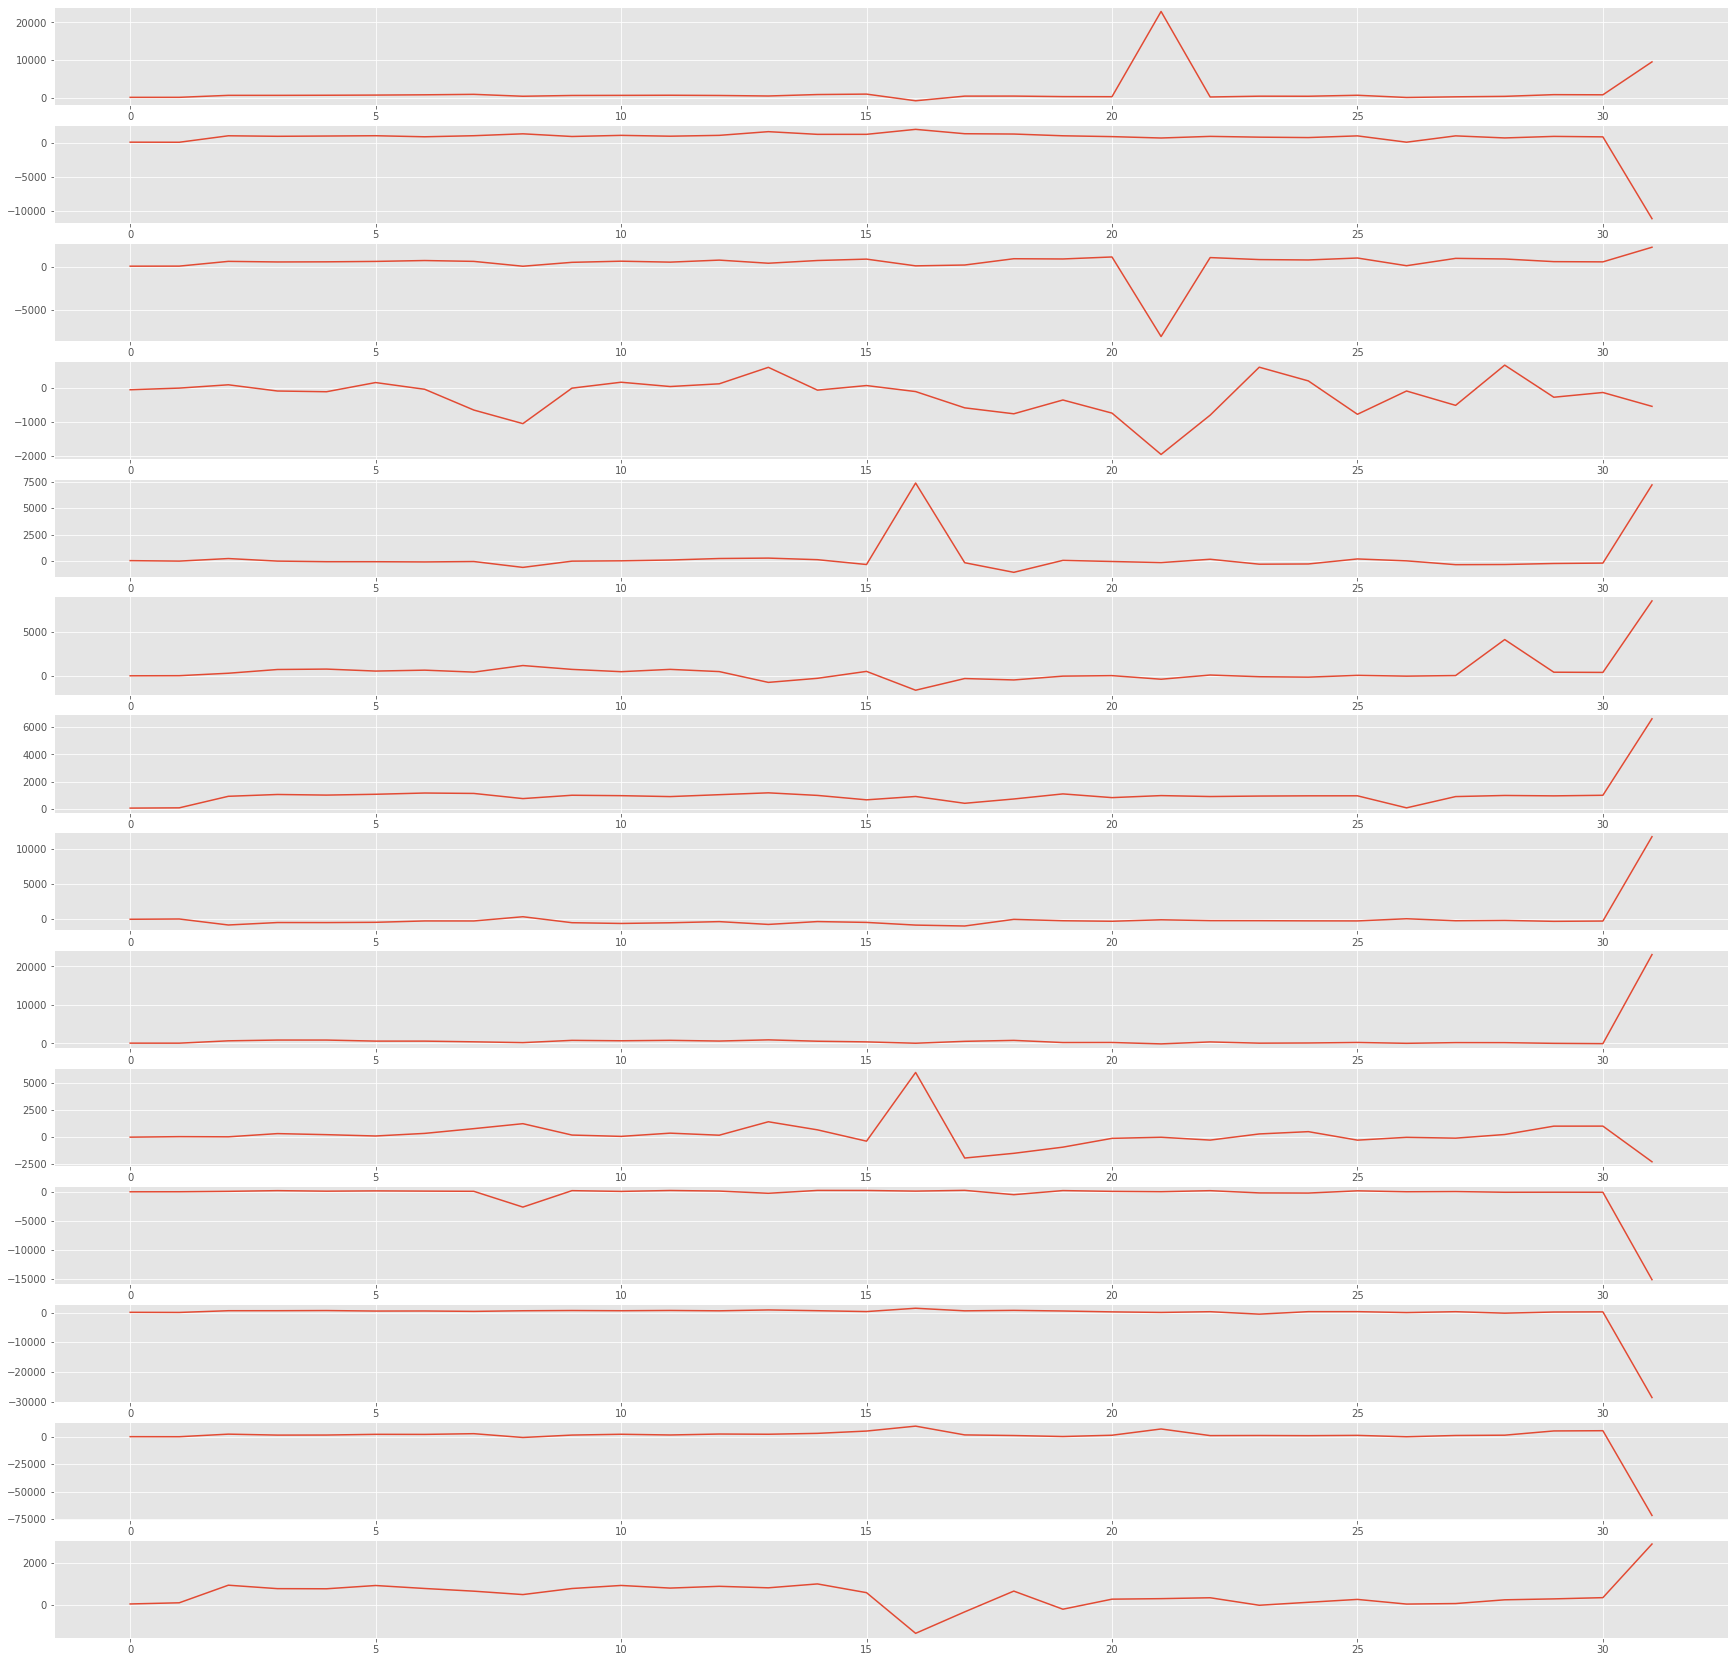

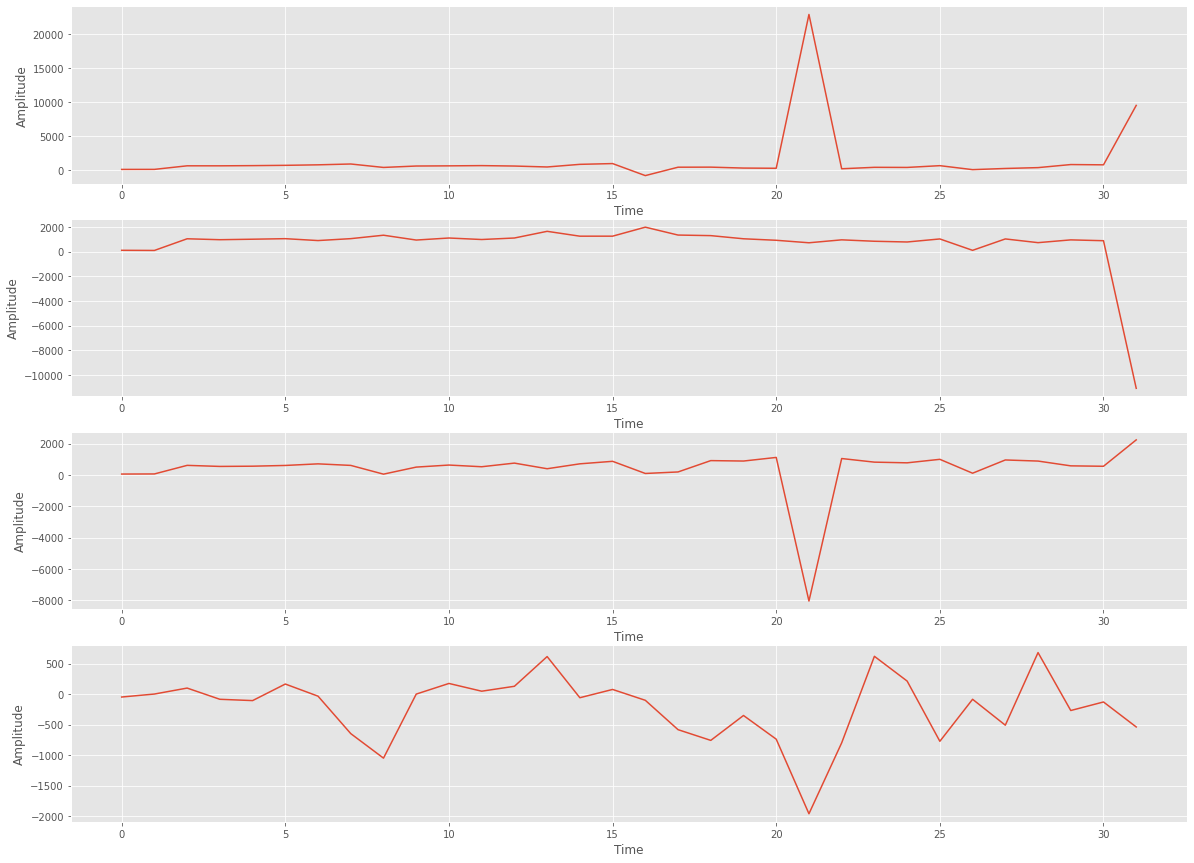

## Data Preprocessing
- High-pass filter - TO remove th DC components of signals and also the drifts (usually a frequency cut-off of 1 Hz is enough)
- Low-pass filter - To remove the high frequency components (Frequency>90hz is Gamma range)
- Electrooculogram (EOG) Artefact correction - Apply if the subject under recording is keeping his/her eyes open. (Blinks and eye movements generate strong electrical fields that affect our EEG recording)
- Cut signals in epochs of few seconds and extract features out of each one of these

#### Brainwave Frequencies
- Gamma, 30 to 50 Hz
- Beta, 14 to 30 Hz
- Alpha, 8 to 14 Hz
- Theta, 4 to 8 Hz
- Delta, 0.1 to 4 Hz

In [ ]:
theta = (4,8)
alpha = (8,12)
beta = (12,40)

In [ ]:
def get_fft(snippet):
    Fs = 128.0;  # sampling rate
    #Ts = len(snippet)/Fs/Fs; # sampling interval
    snippet_time = len(snippet)/Fs
    Ts = 1.0/Fs; # sampling interval
    t = np.arange(0,snippet_time,Ts) # time vector

    # ff = 5;   # frequency of the signal
    # y = np.sin(2*np.pi*ff*t)
    y = snippet
#     print('Ts: ',Ts)
#     print(t)
#     print(y.shape)
    n = len(y) # length of the signal
    k = np.arange(n)
    T = n/Fs
    frq = k/T # two sides frequency range
    frq = frq[range(n//2)] # one side frequency range

    Y = np.fft.fft(y)/n # fft computing and normalization
    Y = Y[range(n//2)]
    #Added in: (To remove bias.)
    #Y[0] = 0
    return frq,abs(Y)
#f,Y = get_fft(np.hanning(len(snippet))*snippet)

In [ ]:
def theta_alpha_beta_averages(f,Y):
    theta_range = (4,8)
    alpha_range = (8,12)
    beta_range = (12,40)
    theta = Y[(f>theta_range[0]) & (f<=theta_range[1])].mean()
    alpha = Y[(f>alpha_range[0]) & (f<=alpha_range[1])].mean()
    beta = Y[(f>beta_range[0]) & (f<=beta_range[1])].mean()
    return theta, alpha, beta

In [ ]:
def make_steps(samples,frame_duration,overlap):
    '''
    in:
    samples - number of samples in the session
    frame_duration - frame duration in seconds
    overlap - float fraction of frame to overlap in range (0,1)

    out: list of tuple ranges
    '''
    #steps = np.arange(0,len(df),frame_length)
    Fs = 128
    i = 0
    intervals = []
    samples_per_frame = Fs * frame_duration
    while i+samples_per_frame <= samples:
        intervals.append((i,i+samples_per_frame))
        i = i + samples_per_frame - int(samples_per_frame*overlap)
    return intervals

In [ ]:
def make_frames(df,frame_duration):
    '''
    in: dataframe or array with all channels, frame duration in seconds
    out: array of theta, alpha, beta averages for each probe for each time step
        shape: (n-frames,m-probes,k-brainwave bands)
    '''
    Fs = 128.0
    frame_length = Fs*frame_duration
    frames = []
    steps = make_steps(len(df),frame_duration,overlap)
    for i,_ in enumerate(steps):
        frame = []
        if i == 0:
            continue
        else:
            for channel in df.columns:
                snippet = np.array(df.loc[steps[i][0]:steps[i][1],int(channel)])
                f,Y =  get_fft(snippet)
                theta, alpha, beta = theta_alpha_beta_averages(f,Y)
                frame.append([theta, alpha, beta])

        frames.append(frame)
    return np.array(frames)

In [ ]:
locs_2d = [(-2.0,4.0),
           (2.0,4.0),
           (-1.0,3.0),
           (1.0,3.0),
           (-3.0,3.0),
           (3.0,3.0),
           (-2.0,2.0),
           (2.0,2.0),
           (-2.0,-2.0),
           (2.0,-2.0),
           (-4.0,1.0),
           (4.0,1.0),
           (-1.0,-3.0),
           (1.0,-3.0)]

In [ ]:
# For hold hand


labels = [1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0]
image_size = 28
frame_duration = 1.0
overlap = 0.5
Fs = 128.0   #sampling rate
frame_length = Fs * frame_duration

print('Generating training data...')

X_0 = make_frames(df_hold,frame_duration)
#steps = np.arange(0,len(df),frame_length)
X_1 = X_0.reshape(len(X_0),14*3)

images = gen_images(np.array(locs_2d),X_1, image_size, normalize=False)
images = np.swapaxes(images, 1, 3)
print(len(images), ' frames generated with label ', labels, '.')
print('\n')
X = images
y = np.ones(len(images))*labels[0

Generating training data...
0  frames generated with label  [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0] .




In [ ]:
X.shape

(0, 28, 28, 3)

In [ ]:
y.shape

(0,)

TypeError: ignored

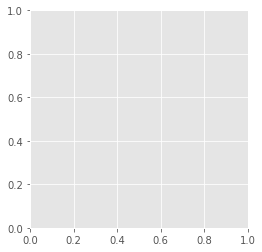

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(X)

## Feature Extraction
- Time Domain Features (Mean, Standard Devaition, Entropy..)
- Frequency Domain Features (Fourier Transform. Wavelets, ..)
- Synchronisity Features (Coherence, Correlation, Mutual Information, ..)
- EEG Tomography (Inverse-Problem Approach)

Or

Converting our EEG Recording into a graph then analyzing its properties using standard comploex network analaysis techniques

## Feature Selection
- Principal Component Analysis
- Genetic Algorithms (Advanced)

## Classification
